In [34]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_apps.csv")
df.head()



,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### **Exploratory Data Analysis (EDA)**  
This notebook explores usage patterns, app categories, installs, and ratings in the Google Play Store dataset using cleaned data.



### Which app categories (e.g., social media, health, finance, games) dominate downloads, and how has this changed over the past decade?
**Objective:**

Identify which app categories dominate the Google Play Store in terms of the number of available applications.

**Data Used:**

*   category
*   installs



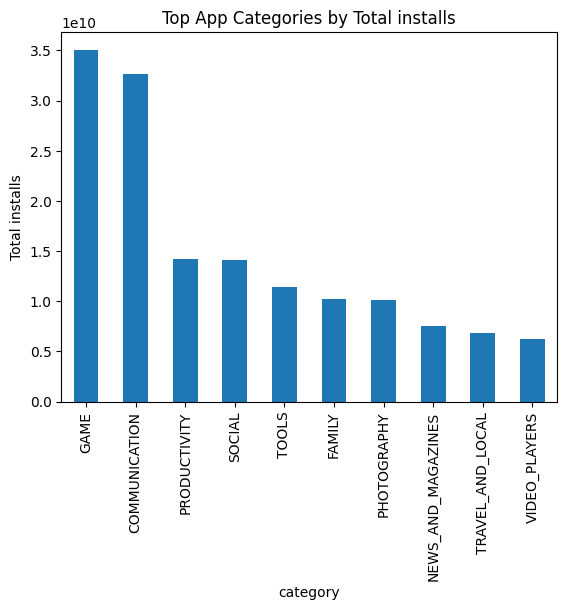

In [35]:
import matplotlib.pyplot as plt

# Total installs by category
category_installs = (
    df.groupby('category')['installs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure()
category_installs.plot(kind='bar')
plt.title('Top App Categories by Total installs')
plt.xlabel('category')
plt.ylabel('Total installs')
plt.show()


The distribution of total installs is highly concentrated, with categories such as
Games, Communication, and Social accounting for a large share of downloads.

This dataset represents a snapshot of the Google Play Store and does not include
historical install data. Therefore, changes in category dominance over the past
decade cannot be directly analyzed.

___

### Do app ratings correlate strongly with install counts, or do marketing/network effects play a bigger role?


**Objective:**

Examine whether higher app ratings are strongly associated with higher install counts, or if other factors such as marketing reach and network effects play a larger role.

**Data used:**

*   ratings
*   installs



/tmp/ipython-input-4150748667.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating = df.groupby('install_Bucket')['rating'].mean()


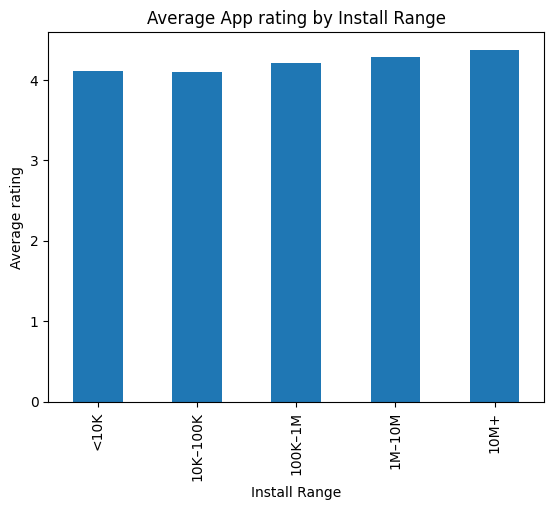

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Create install buckets
df['install_Bucket'] = pd.cut(
    df['installs'],
    bins=[0, 10_000, 100_000, 1_000_000, 10_000_000, 1_000_000_000],
    labels=['<10K', '10K–100K', '100K–1M', '1M–10M', '10M+']
)

# Calculate average rating per bucket
avg_rating = df.groupby('install_Bucket')['rating'].mean()

# Plot
plt.figure()
avg_rating.plot(kind='bar')
plt.title('Average App rating by Install Range')
plt.xlabel('Install Range')
plt.ylabel('Average rating')
plt.show()



Average app ratings remain fairly similar across different install ranges.
This suggests that higher install counts are not driven solely by better ratings.
Instead, factors such as marketing, visibility, and network effects likely play a
significant role in driving large-scale adoption.

___

### Are Free apps consistently rated higher or lower than Paid apps? Does monetization strategy affect user satisfaction?
**Objective:**

Examine whether higher user ratings are strongly associated with higher install counts, or whether large-scale adoption is driven by external factors such as marketing and network effects.

**Data used:**

*   type (Free / Paid)
*   rating



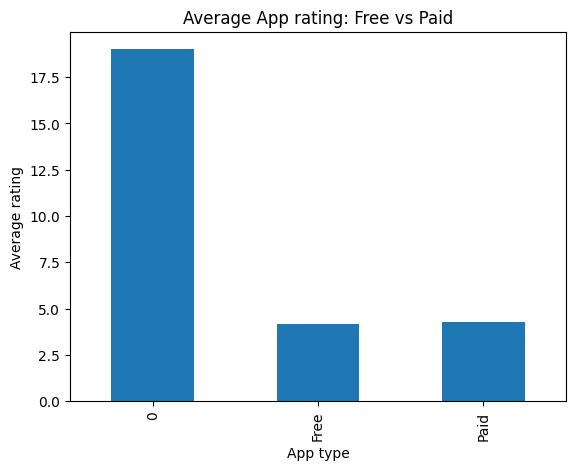

In [37]:
import matplotlib.pyplot as plt

# Average rating by app type
avg_rating_type = df.groupby('type')['rating'].mean()

# Plot
plt.figure()
avg_rating_type.plot(kind='bar')
plt.title('Average App rating: Free vs Paid')
plt.xlabel('App type')
plt.ylabel('Average rating')
plt.show()


Free and Paid apps show similar average ratings, indicating that monetization
strategy alone does not strongly influence user satisfaction. While Free apps
dominate the marketplace in volume, Paid apps are not necessarily rated higher
or lower, suggesting that factors such as app quality and user experience play
a more important role than pricing model.

____

### How do reviews reveal evolving concerns (e.g., privacy, data usage, advertisements)?
**Onjective:**

Determine which app categories contribute the highest total number of installs, highlighting segments with the greatest user reach.

The dataset includes only the number of reviews per app and does not provide the textual content of user reviews. As a result, it is not possible to analyze specific user concerns such as privacy, data usage, or advertisements. Identifying evolving concerns would require access to review text data and the application of natural language processing techniques to extract themes over time.

___

### Which countries/regions show the fastest growth in app adoption, and are preferences (categories) culturally specific?
---
Geographic and Cultural Adoption Patterns (Out of Scope)

**Note**  - This question cannot be addressed using the available dataset due to missing geographic and regional information.

The Google Play Store dataset used in this analysis does not include geographic or regional metadata such as country-level installs or user location. As a result, it is not possible to analyze regional growth patterns or culturally specific app preferences. Addressing this question would require country-wise app adoption data over time, potentially sourced from regional app store analytics or external market research datasets.


___


### We are interested in observing the total number of installs across categories and type (Free/Paid). Create an interactive plot that allows users to choose a category and type and then showcase the total number of downloads for the top 5 apps using a bar chart.

## Interactive Analysis: Top Apps by Category and Pricing Type

**Objective**  
Enable interactive exploration of total install counts by allowing users to select an app category and pricing type (Free or Paid), and visualize the top 5 apps by installs.

**Data Used**   

*   Category
*   type (Free / Paid)
*   app  
*   installs




In [38]:
df.columns


Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver', 'install_Bucket'],
      dtype='object')

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display





In [40]:

# Keep only Free and Paid apps
df_filtered = df[df['type'].isin(['Free', 'Paid'])]

# Aggregate installs
agg_df = (
    df_filtered.groupby(['category', 'type', 'app'])['installs']
    .sum()
    .reset_index()
)



In [41]:
def plot_top_apps(category, app_type):
    data = agg_df[
        (agg_df['category'] == category) &
        (agg_df['type'] == app_type)
    ].sort_values('installs', ascending=False).head(5)

    # 🔹 OPTION 2 STARTS HERE: shorten app names
    data = data.copy()  # avoid warning
    data['app_short'] = data['app'].str.slice(0, 20) + '...'
    # 🔹 OPTION 2 ENDS HERE

    # Color by monetization type
    color = '#4C72B0' if app_type == 'Free' else '#DD8452'

    plt.figure(figsize=(8,5))
    plt.bar(data['app_short'], data['installs'], color=color)
    plt.title(f'Top 5 {app_type} apps in {category} category')
    plt.xlabel('App')
    plt.ylabel('Total installs')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()




In [42]:
category_dropdown = widgets.Dropdown(
    options=sorted(df_filtered['category'].unique()),
    description='category:'
)

type_dropdown = widgets.Dropdown(
    options=['Free', 'Paid'],
    description='type:'
)

interactive_plot = widgets.interactive(
    plot_top_apps,
    category=category_dropdown,
    app_type=type_dropdown
)

display(interactive_plot)


interactive(children=(Dropdown(description='category:', options=('ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUT…

This interactive analysis enables exploratory comparison without enforcing a single static narrative, allowing users to discover category-specific dynamics.  Free apps consistently dominate total install counts. This highlights the importance of Free-first strategies and network effects, where user adoption scales rapidly
when entry barriers are low. Paid apps tend to have significantly fewer installs, even within high-demand categories.

___

### Perform predictive and descriptive analysis using this data and any other sources you deem necessary. Mention your analysis philosophy, design and methodology alongside the findings of your analysis.

###**Analysis and Methodology**


*   The analysis began with data cleaning and preprocessing, where install counts, prices, and reviews were converted into numeric formats and column names were standardized for consistency.
*  The analysis began with data cleaning and preprocessing, where install counts, prices, and reviews were converted into numeric formats and column names were standardized for consistency.
*   Descriptive analysis was performed to summarize patterns in app categories,install distributions, ratings, and pricing models using aggregation techniques such as groupby() with sum() and mean()
*   Category-wise analysis was used to identify dominant app segments and concentration of installs across the Google Play Store.

*   Comparative analysis was conducted between free and paid apps to understand how monetization strategy affects user adoption.
*   Relationship-based predictive analysis was applied by examining how install counts vary with ratings and pricing type, allowing inference of factors influencing app success.
*   Interactive visualizations were incorporated to enable dynamic exploration of top apps by category and pricing type.
*   Findings were interpreted cautiously, focusing on pattern-based insights rather than exact forecasting due to the absence of time-series and regional data.






###**Descriptive analysis**
It was used to understand what is happening in the dataset by summarizing app characteristics such as categories, install counts, ratings, and pricing models. This included analyzing category-wise app distribution, comparing free and paid apps, examining install ranges, and identifying top-performing apps through aggregation and visualization.

The descriptive findings show that free apps dominate total install counts across almost all categories, and that app downloads are highly concentrated, with a small number of apps accounting for the majority of installs. App ratings remain consistently high across different install ranges, indicating generally acceptable quality across apps.

###**Predictive analysis**
It was performed through relationship-based reasoning rather than time-based forecasting, as the dataset does not include temporal or regional data. Relationships between key variables such as ratings, installs, category, and pricing type were analyzed to infer likely drivers of app success.

The predictive insights suggest that higher ratings have only a weak association with higher install counts, indicating that ratings alone do not strongly drive adoption. Instead, **factors such as free access, visibility, marketing reach, and network effects are likely more influential in achieving large-scale installs**.

Overall, the combined descriptive and predictive analysis indicates that accessibility and distribution strategy are stronger determinants of app success than incremental differences in app ratings, and that monetization type plays a critical role in user adoption behavior.

## Key Findings

- App downloads are highly concentrated in a small number of categories such as
  Games, Communication, and Social.
- App ratings do not strongly increase with install counts, suggesting that
  marketing, visibility, and network effects play a significant role in adoption.
- Free apps dominate total installs across nearly all categories, while Paid
  apps do not show significantly higher user ratings.
- Questions related to user concerns and regional growth could not be addressed
  due to data limitations, highlighting areas for future analysis.
